In [1]:
import urllib, requests, socket, re, lxml, io, bs4, sqlite3, pandas, sqlalchemy
from requests.compat import urljoin, urlparse, unquote
from bs4 import BeautifulSoup
import re
import pandas as pd

#Парсинг отзывов первого магазина WhyNotFlowers
url_1 = "https://yandex.ru/maps/org/why_not_flowers/61726991025/reviews/?ll=37.593134%2C55.765479&z=16"

'''proxies = {
    "http": "http://user:pass@ip:port",
    "https": "http://user:pass@ip:port",
}'''

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7",
    "Referer": "https://yandex.ru/maps/",  #прокси и заголовки взяты из deepseek, чтобы сайт не выдавал капчу
}
html_1 = requests.get(url_1, headers=headers).text

soup=BeautifulSoup(html_1, "html.parser")

review_blocks_1 = soup.findAll('span', class_='business-review-view__body-text')
reviews_1 = [review.get_text(strip=True) for review in review_blocks_1]

names_blocks_1 = soup.findAll('span', itemprop="name", dir="auto")
names_1 = [name.get_text(strip=True) for name in names_blocks_1]

data_why_not = pd.DataFrame([names_1, reviews_1])

#Парсинг отзывов второго магазина FlowersLowers
url_2 = "https://yandex.ru/maps/org/flowers_lovers/203271761188/reviews/?ll=37.630046%2C55.789294&z=16"

html_2 = requests.get(url_2, headers=headers).text
soup_2=BeautifulSoup(html_2, "html.parser")

review_blocks_2 = soup_2.find_all('span', class_='business-review-view__body-text')
reviews_2 = [review.get_text(strip=True) for review in review_blocks_2]

names_blocks_2 = soup_2.find_all('span', itemprop="name", dir="auto")
names_2 = [name.get_text(strip=True) for name in names_blocks_2]

data_lovers = pd.DataFrame([names_2, reviews_2])

<ipython-input-1-9eb088789fec>:24: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  review_blocks_1 = soup.findAll('span', class_='business-review-view__body-text')
<ipython-input-1-9eb088789fec>:27: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  names_blocks_1 = soup.findAll('span', itemprop="name", dir="auto")


(                                                  0   \
 0                                 Анастасия Надежная   
 1  Зашла за обычным букетом, а попала в настоящий...   
 
                                                   1   \
 0                                       Елена Исаева   
 1  Красивый, душевный магазин, входная зона очень...   
 
                                                   2   \
 0                                 Валентина Суботина   
 1  Не ожидала такой большой выбор цветов в одном ...   
 
                                                   3   \
 0                                   Евгения Лазарева   
 1  Такое разнообразие цветов давно не видела! Мож...   
 
                                                   4   \
 0                                   Ульяна Журавкина   
 1  Искала подарок подруге и случайно нашла идеаль...   
 
                                                   5   \
 0                                   Надежда Секачева   
 1  Мне нравится, что

In [2]:
import urllib, requests, socket, re, lxml, io, bs4, sqlite3, pandas, sqlalchemy
from requests.compat import urljoin, urlparse, unquote
from bs4 import BeautifulSoup
import re
import pandas as pd

#Парсинг отзывов первого магазина Расцветай
url_3 = "https://yandex.ru/maps/org/rastsvetay/220701587281/reviews/?ll=37.582766%2C55.762583&z=21"

'''proxies = {
    "http": "http://user:pass@ip:port",
    "https": "http://user:pass@ip:port",
}'''

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7",
    "Referer": "https://yandex.ru/maps/",  #прокси и заголовки взяты из deepseek, чтобы сайт не выдавал капчу
}
html_3 = requests.get(url_3, headers=headers).text

soup=BeautifulSoup(html_3, "html.parser")

review_blocks_3 = soup.findAll('span', class_='business-review-view__body-text')
reviews_3 = [review.get_text(strip=True) for review in review_blocks_3]

names_blocks_3 = soup.findAll('span', itemprop="name", dir="auto")
names_3 = [name.get_text(strip=True) for name in names_blocks_3]

data_rascvetai = pd.DataFrame([names_3, reviews_3])


<ipython-input-2-10e95fe83e22>:24: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  review_blocks_3 = soup.findAll('span', class_='business-review-view__body-text')
<ipython-input-2-10e95fe83e22>:27: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  names_blocks_3 = soup.findAll('span', itemprop="name", dir="auto")


In [3]:
data_rascvetai = pd.DataFrame([names_3, reviews_3])

In [4]:
pip install gender-guesser

In [5]:
pip install transliterate

In [15]:
import gender_guesser.detector as gender
from transliterate import translit
import matplotlib.pyplot as plt
import seaborn as sns

detector = gender.Detector()

class TargAudience:
    def __init__(self, df, name):
        self.df=df
        self.name=name

    def sexes(self):
       men = 0
       women = 0
       for i in range(len(self.df.columns)):
          name=translit(str(self.df.iloc[0][i]).split(" ")[0], 'ru', reversed=True).capitalize()
          name = name.replace("'j", "i")
          name = name.replace("'", "")
          result = detector.get_gender(name)
          if result == "female" or result == "mostly_female":
            women+=1
          elif result == "male" or result == "mostly_male":
            men+=1
       proportion_w = women/len(self.df.columns)
       proportion_m = men/len(self.df.columns)
       return [men, women, proportion_m, proportion_w]

    def sexes_to_data(self):
      sexes_list = []
      for i in range(len(self.df.columns)):
        name=translit(str(self.df.iloc[0][i]).split(" ")[0], 'ru', reversed=True).capitalize()
        name = name.replace("'j", "i")
        name = name.replace("'", "")
        result = detector.get_gender(name)
        if result == "female" or result == "mostly_female":
             sexes_list.append("f")
        elif result == "male" or result == "mostly_male":
             sexes_list.append("m")
        else:
            sexes_list.append(" ")
      self.df.loc[len(self.df)]= sexes_list
      return self.df

    def find_key_word(self, keyword):
      key_meet_times, key_times_w, key_times_m = 0, 0, 0
      key_meet_times = int(self.df.apply(lambda row: row.str.contains(rf'{keyword}', case=False, na=False)).sum(axis=0).sum()) #lambda row: row.str.contains(rf'\b{keyword}\b', case=False, na=False)
      return key_meet_times

    def create_key_dict(self):
      dict_keys = {"Получатель":{}, "Замечания": {}, "Цели": {}, "Ощущения": {} }
      reciever_keys=["мам", "подруг", "себ", "жен", "сестр", "девушк", "дочер", "половин"]
      notes_keys=["ассортимент", "флорист", "сотрудн", "доставк", "сервис", "цена", "обслуж", "персонал"]
      targets_keys=["свадьб", "свадеб", "день рожден", "домой", "интерьер", "без повода", "8 март", "поздрав", "офис"]
      feelings_keys=["хорош", "прекрасн", "уютн", "атмосферн", "красив", "ужас", "плох", "быстр", 'медлен', "дорог", "недорог", "дешев", "груб", "вежлив", "невежлив"]
      for key in reciever_keys:
        dict_keys["Получатель"][key] = self.find_key_word(key)
      for key in notes_keys:
        dict_keys["Замечания"][key] = self.find_key_word(key)
      for key in targets_keys:
        dict_keys["Цели"][key] = self.find_key_word(key)
      for key in feelings_keys:
        dict_keys["Ощущения"][key] = self.find_key_word(key)
      return dict_keys

    def create_reciever_diagram(self):
      labels = ['Матери', 'Сестре', 'Подруге', 'Девушке/жене', 'Для себя']
      r = [self.create_key_dict()['Получатель']["мам"], self.create_key_dict()['Получатель']['сестр'], self.create_key_dict()['Получатель']["подруг"], self.create_key_dict()['Получатель']["девушк"]+ self.create_key_dict()['Получатель']["жен"]+ self.create_key_dict()['Получатель']["половин"], self.create_key_dict()['Получатель']["себ"]]
      r_new = [i for i in r if i!=0]
      labels_new =[labels[i] for i in range(len(labels)) if r[i]!=0]
      sizes = [i/sum(r_new) for i in r_new]
      colors = sns.color_palette('pastel')[0:5]
      plt.figure(figsize=(6, 6))
      plt.pie(sizes, labels=labels_new, colors=colors, autopct='%1.1f%%', startangle=140)
      plt.title(f'Распределение получателей букетов, купленных в {self.name}', fontsize=16)
      plt.axis('equal')
      plt.show()
      return sum(r_new)

In [7]:
whynot_users = TargAudience(data_why_not, "Why Not Flowers")
print(whynot_users.create_key_dict())

{'Получатель': {'мам': 6, 'подруг': 6, 'себ': 4, 'жен': 4, 'сестр': 1, 'девушк': 4, 'дочер': 0, 'любимой': 1}, 'Замечания': {'ассортимент': 7, 'флорист': 14, 'сотрудн': 2, 'доставк': 5, 'сервис': 6, 'цена': 1, 'обслуж': 4, 'персонал': 6}, 'Цели': {'свадьб': 0, 'свадеб': 0, 'день рожден': 5, 'домой': 2, 'интерьер': 0, 'без повода': 0, '8 март': 2, 'поздрав': 1, 'офис': 2}, 'Ощущения': {'хорош': 7, 'прекрасн': 6, 'уютн': 9, 'атмосферн': 1, 'красив': 17, 'ужас': 1, 'плох': 2, 'быстр': 2, 'медлен': 0, 'дорог': 3, 'недорог': 1, 'дешев': 1, 'груб': 0, 'вежлив': 3, 'невежлив': 0}}


In [8]:
lovers_users = TargAudience(data_lovers, "Flowers Lovers")
lovers_sexes_stat = lovers_users.sexes()
#lovers_users_sexes = lovers_users.sexes_to_data()
print(lovers_users.create_key_dict())

{'Получатель': {'мам': 1, 'подруг': 0, 'себ': 0, 'жен': 1, 'сестр': 1, 'девушк': 2, 'дочер': 0, 'любимой': 0}, 'Замечания': {'ассортимент': 2, 'флорист': 8, 'сотрудн': 2, 'доставк': 24, 'сервис': 15, 'цена': 1, 'обслуж': 3, 'персонал': 4}, 'Цели': {'свадьб': 0, 'свадеб': 1, 'день рожден': 2, 'домой': 0, 'интерьер': 0, 'без повода': 0, '8 март': 0, 'поздрав': 0, 'офис': 1}, 'Ощущения': {'хорош': 3, 'прекрасн': 8, 'уютн': 0, 'атмосферн': 0, 'красив': 17, 'ужас': 0, 'плох': 1, 'быстр': 6, 'медлен': 0, 'дорог': 0, 'недорог': 0, 'дешев': 0, 'груб': 0, 'вежлив': 7, 'невежлив': 0}}


In [9]:
rascvetai_users = TargAudience(data_rascvetai, "Расцветай")
rascvetai_sexes_stat = rascvetai_users.sexes()
#lovers_users_sexes = lovers_users.sexes_to_data()
print(rascvetai_users.create_key_dict())

{'Получатель': {'мам': 0, 'подруг': 1, 'себ': 0, 'жен': 6, 'сестр': 0, 'девушк': 5, 'дочер': 0, 'любимой': 0}, 'Замечания': {'ассортимент': 1, 'флорист': 11, 'сотрудн': 0, 'доставк': 2, 'сервис': 6, 'цена': 1, 'обслуж': 2, 'персонал': 2}, 'Цели': {'свадьб': 0, 'свадеб': 0, 'день рожден': 1, 'домой': 2, 'интерьер': 4, 'без повода': 0, '8 март': 0, 'поздрав': 0, 'офис': 0}, 'Ощущения': {'хорош': 2, 'прекрасн': 5, 'уютн': 2, 'атмосферн': 0, 'красив': 11, 'ужас': 0, 'плох': 0, 'быстр': 3, 'медлен': 0, 'дорог': 3, 'недорог': 1, 'дешев': 0, 'груб': 0, 'вежлив': 2, 'невежлив': 0}}


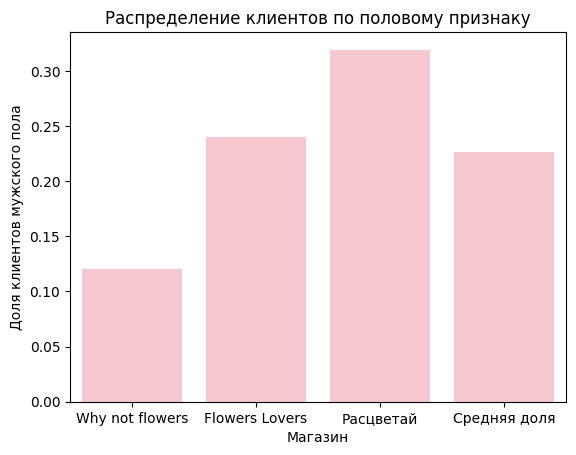

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Построение барплота распределения клиентов по половому признаку
shops = ["Why not flowers", "Flowers Lovers", "Расцветай", "Средняя доля"]
prop = [whynot_users.sexes()[2], lovers_users.sexes()[2], rascvetai_users.sexes()[2], (whynot_users.sexes()[2] + lovers_users.sexes()[2] + rascvetai_users.sexes()[2])/3]

graph_1 = pd.DataFrame([shops, prop], index=['Row 1', 'Row 2'])
graph_1

graph_1 = graph_1.T.reset_index()
graph_1.columns = ['Индекс', 'Магазин', 'Доля клиентов мужского пола']

sns.barplot(x='Магазин', y='Доля клиентов мужского пола', data=graph_1, color='pink')

plt.xlabel('Магазин')
plt.ylabel('Доля клиентов мужского пола')
plt.title('Распределение клиентов по половому признаку')
plt.show()


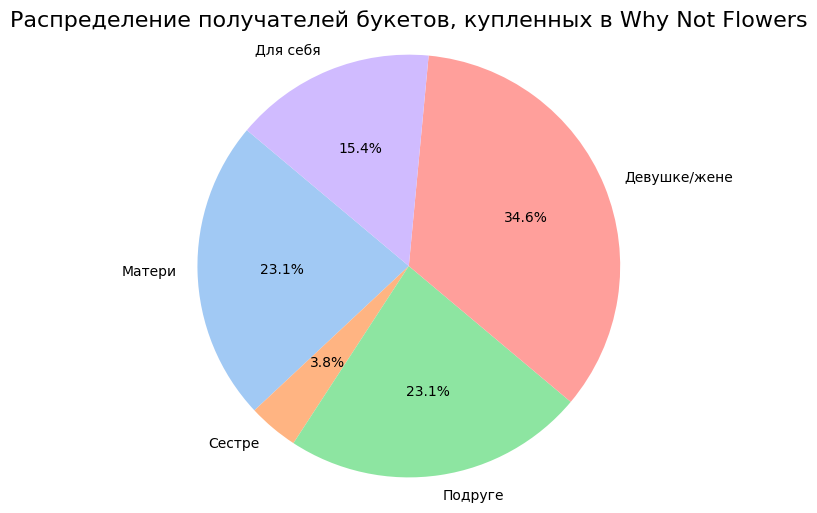

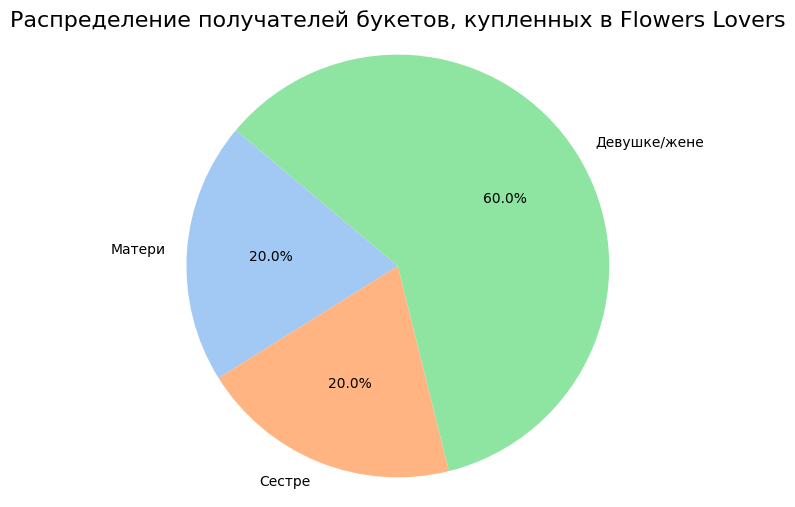

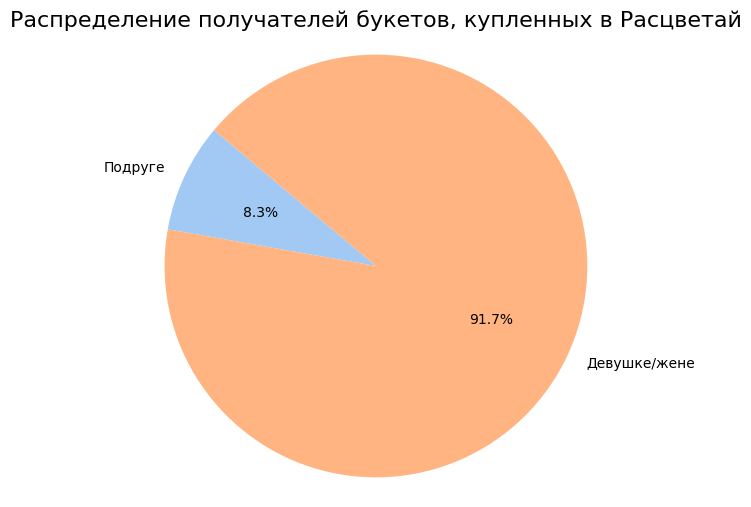

In [16]:
#Построение круговых диаграмм, отображающих наиболее популярных получателей букетов
#1, whynot_flowers
whynot_users.create_reciever_diagram()

#2, lovers_flowers
lovers_users.create_reciever_diagram()

#3, расцветай
rascvetai_users.create_reciever_diagram()

ту ду:

1) распределение получателей общее

2) джобы, которые покупатели реализуют в магазине

3) если успею, распред получателей и целей по полам

4) вывод сценариев покупки, предикт - мужчины своим девушкам и женам, женщины заходят, чтобы купить букет себе и насладиться атмосферой или заказывают для других девушек

5) описать тренды из ссылок для дополнения портретов: https://dzen.ru/a/ZK-qqXPnwVquASc5, https://companies.rbc.ru/news/gN7SdwG7c7/issledovanie-rossiyane-gotovyi-potratit-na-tsvetyi-v-srednem-2-300-rublej/

-------Price parcing-----------------------------------------------

1) выбрать несколько из подборки: Сайты для парсинга цен: https://shop.flowerslovers.ru/index.php?route=product/product&path=103&product_id=104, https://whynot.moscow/flowers?yclid=9374264001538031615&utm_source=geoadv_maps&utm_content=15820996348,  https://bisou-flowers.ru/,  https://dakotaflora.com/orxideya-v-assortimente

2) спарсить с выбранных сайтов монобукеты из роз, ранункулюсов, эустом, тюльпанов и пионов

3) найти средний чек за цветок

4) обсудить с машей ассортимент и рассчитать цену букетов
